In [154]:
import numpy  as np
import pandas as pd

print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 

from   io import StringIO

# ml
import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

print('sklearn version - ' , sklearn.__version__)

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier         
from sklearn.linear_model    import LogisticRegression , LinearRegression


from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer , precision_recall_curve 
from sklearn.impute          import SimpleImputer

from sklearn.metrics         import mean_squared_error, mean_absolute_error

from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


#### Regression(회귀)
- 회귀란 종속변수(target)와 하나이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비선형 접근법 
- 예측이고 예측을 위해서는 종속변수의 타입은 연속된 숫자이여야 한다
- 회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
- Y = (w * x) + b
- w : weight , b : bias
- cost(w, b) - 업데이트를 통해서 예측값과 실제값의 차이를 계산
- 회귀계수 : coefficients -> 독립변수가 종속변수에 미치는 영향의 강도
- 회귀유형 : 독립변수 1개이면    단일회귀 - 선형회귀
- 회귀유형 : 독립변수 여러개이면 다중회귀 - 비선형회귀


In [ ]:
print('단일회귀 - ') 
print()
frm = pd.DataFrame({
  "height" : [1.47, 1.50, 1.52, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.75, 1.78, 1.80, 1.83],
  "mass"   : [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 68.92]
})
frm

In [ ]:
print("독립변수 또는 설명변수 - ") 
print('type - ' , type(frm[['height']]) , frm[['height']].shape)
X = frm[['height']]

In [ ]:
print("종속변수 - ") 
print('type - ' , type(frm[['mass']]) , frm[['mass']].shape)
Y = frm[['mass']]

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(X, Y, 'o')

plt.show()
plt.close()

In [ ]:
sns.pairplot(frm)
plt.show()
plt.close()

In [ ]:
linear_model = LinearRegression() # 모델 생성
linear_model.fit(X, Y)  # fit을 통해서 학습시킴

In [ ]:
print('사용자 데이터를 입력하여 예측값을 확인 - ') 
user_pred = linear_model.predict([[1.79]]) # 형식은 2차원이여야 한다.
print('user pred - ' , user_pred)
y_pred = linear_model.predict(X)
print('y_pred - ' , y_pred)


In [ ]:
print("w = 기울기 : " , linear_model.coef_)
print()
print('b = 절편   : ' , linear_model.intercept_)

In [ ]:
# 1.47 -> X 첫번째 데이터에서 * 기울기 + 절편 = 예측값
(47.66432207 * 1.79) + -18.48535678

In [ ]:
print("R - squared(결정계수) - ")
print()
print('R = ' , linear_model.score(X,Y)) 

In [ ]:
y_pred = linear_model.predict(X)
y_pred

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(X, Y, 'o')
# plt.plot(X, linear_model.predict(X))
plt.plot(X, y_pred)

plt.show()
plt.close()

In [ ]:
mpg_frm = pd.read_csv('output/auto-mpg.csv' , header = None)
mpg_frm.columns = ['mpg', 'cylinders' , 'displacement', 'horsepower', 'weight', 'acc', 'model year', 'origin', 'name'] 

In [ ]:
mpg_frm.info()

In [ ]:
mpg_frm.describe()

In [ ]:
mpg_frm['horsepower'].unique()

In [ ]:
mpg_frm['horsepower'].replace('?' , np.NaN , inplace = True) # 결측처리

In [ ]:
mpg_frm['horsepower'].unique()

In [ ]:
mpg_frm.dropna(subset=['horsepower'] , axis=0 , inplace = True)

In [ ]:
mpg_frm['horsepower'].unique()

In [ ]:
mpg_frm['horsepower'] = mpg_frm['horsepower'].astype('float')
mpg_frm['horsepower'].unique()

In [ ]:
mpg_frm.info()

In [ ]:
print('다중회귀 - ')
mpg_subset_frm = mpg_frm[['mpg', 'cylinders', 'horsepower' , 'weight']]
mpg_subset_frm

In [ ]:
sns.pairplot(mpg_subset_frm)
plt.show()
plt.close()

In [ ]:
print('종속변수 독립변수 분리 - ') 
print('종속변수 - ')
Y = mpg_subset_frm['mpg']
print('독릷변수 - ')
X = mpg_subset_frm[['cylinders' , 'horsepower' , 'weight']] 


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, Y,
                                                     test_size = 0.2,
                                                     random_state = 111) 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

In [ ]:
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(X_train, y_train)
print("w = 기울기 : " , mpg_linear_model.coef_)
print()
print('b = 절편   : ' , mpg_linear_model.intercept_)

In [ ]:
print('모델의 신뢰도 - score')
r_squared = mpg_linear_model.score(X_test, y_test)
print(r_squared)

In [ ]:
print('예측 - ')
y_pred = mpg_linear_model.predict(X_test)
y_pred

In [ ]:
regression_actual_guess = pd.DataFrame({
    'actual' : y_test , 
    'guess'  : y_pred
})
regression_actual_guess

In [ ]:
plt.figure(figsize=(10,5))

ax1 = sns.distplot(y_test, hist=False, label='actual')
ax2 = sns.distplot(y_pred, hist=False, label='guess')



plt.legend()
plt.show()
plt.close()

In [ ]:

house_frm = pd.read_csv('output/manhattan.csv')
house_frm.head()
house_frm.info()

In [ ]:
Y = house_frm['rent']

X = house_frm[['bedrooms' , 'bathrooms' , 'size_sqft', 'min_to_subway', 'floor', 'no_fee']] 

In [ ]:
print('상관관계 분석을 위한 시각화 - ')
print()

fig, axs = plt.subplots(figsize=(16,14), ncols=4, nrows=3)

for idx, feature in enumerate(X):
    row = int(idx / 4)
    col = idx % 4
    sns.regplot(x=feature, y='rent', data=house_frm, ax=axs[row][col])


In [ ]:
print('데이터셋 분리')
print('모델 생성 및 학습')
print('기울기 절편 확인')
print('모델의 신뢰도 확인')
print('사용자의 데이터를 넣어서 가격 예측')
print('실제 임대료 에측 임대료 프레임 구축')
print('scatter 이용해서 실제 임대료, 예측 임대로 분포확인')

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, Y,
                                                     test_size = 0.2,
                                                     random_state = 111) 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

In [ ]:
rent_linear_model = LinearRegression()
rent_linear_model.fit(X_train, y_train)
print("w = 기울기 \n: " , rent_linear_model.coef_)
print()
print('b = 절편   : ' , rent_linear_model.intercept_)

In [ ]:
rent_squared = rent_linear_model.score(X_test, y_test)
print(rent_squared)

In [ ]:
print('예측 - ')

my_apt = [[2,1,620,10,11,12]]
user_pred = rent_linear_model.predict(my_apt)
user_pred


y_pred = rent_linear_model.predict(X_test)
y_pred

In [ ]:
regression_actual_guess = pd.DataFrame({
    'actual' : y_test , 
    'guess'  : y_pred
})
regression_actual_guess

In [ ]:
plt.figure(figsize=(10,5))

ax1 = sns.distplot(y_test, hist=False, label='actual')
ax2 = sns.distplot(y_pred, hist=False, label='guess')


plt.legend()
plt.show()
plt.close()

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.8)

plt.xlabel('actual')
plt.ylabel('guess')


plt.show()
plt.close()

In [140]:
### 성능 지표

iris = load_iris()
print('type - ', type(iris))
print('keys - ', iris.keys())

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [166]:
print('종속변수 - ') # 데이터 분리
Y = pd.DataFrame(data = iris.target, columns=['species'])
Y

종속변수 - 


,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [163]:
print('독립변수 - ') # 데이터 분리
X = pd.DataFrame(data = iris.data, columns=iris.feature_names)
X

독립변수 - 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [167]:
# 프레임 병합 
Y['species'] = Y['species'].replace([0,1,2] , 
                                    ['setosa', 'versicolor', 'vriginica'])
iris_frm = pd.concat([X,Y] , axis = 1) 
iris_frm 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,vriginica
146,6.3,2.5,5.0,1.9,vriginica
147,6.5,3.0,5.2,2.0,vriginica
148,6.2,3.4,5.4,2.3,vriginica


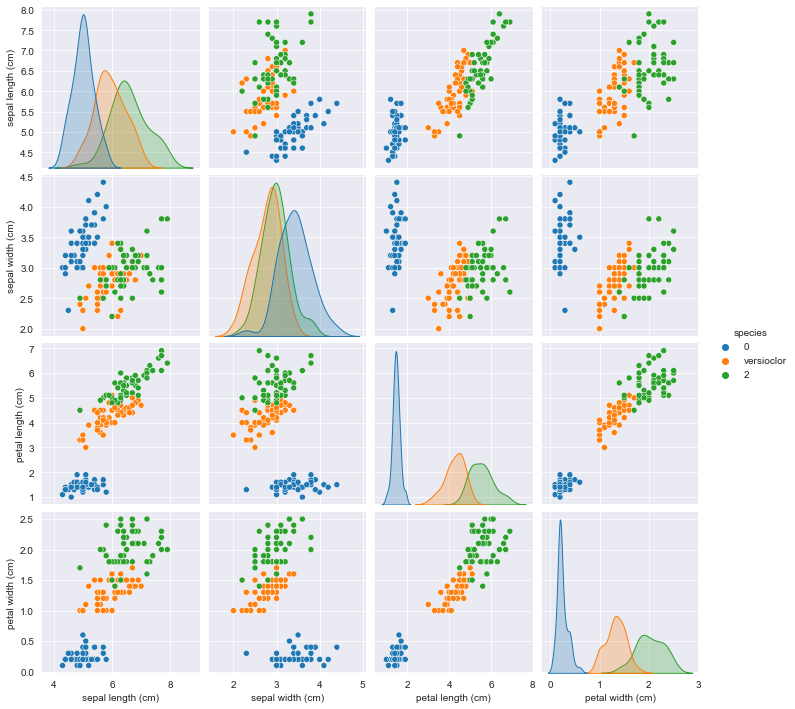

In [165]:
sns.pairplot(iris_frm, hue='species')

In [169]:
iris_frm['species'] = iris_frm['species'].replace(['setosa', 'versicolor', 'vriginica'] ,
                                                  [0,1,2])  

In [170]:
iris_frm.head()
iris_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [171]:
print('종속변수 - ') # 데이터 분리
Y = iris_frm['sepal length (cm)']
Y

print('독립변수 - ')
X = iris_frm.drop('sepal length (cm)' , axis = 1)
X

종속변수 - 
독립변수 - 


,sepal width (cm),petal length (cm),petal width (cm),species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [172]:
iris_model = LinearRegression() # 모델 생성
iris_model.fit(X, Y)

LinearRegression()

In [173]:
r_squared = iris_model.score(X,Y)
r_squared

0.8621931701975808

In [174]:
user_pred = iris_model.predict([[4.2,1.3,0.2,1]])
user_pred

array([5.13591913])

In [175]:
X_train, X_test , y_train, y_test = train_test_split(X, Y,
                                                     test_size = 0.2,
                                                     random_state = 111) 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [176]:
iris_model = LinearRegression() # 모델 생성
iris_model.fit(X, Y) 

LinearRegression()

In [177]:
r_squared = iris_model.score(X,Y)
r_squared

0.8621931701975808

In [179]:
y_pred = iris_model.predict(X_test)
iris_actual_guess = pd.DataFrame({
    'actual_sepal_length' : y_test , 
    'guess_sepal_length'  : y_pred
})
iris_actual_guess

,actual_sepal_length,guess_sepal_length
39,5.1,5.010637
26,5.0,5.004034
109,7.2,7.170132
123,6.3,5.999007
77,6.7,6.527687
24,4.8,5.307807
0,5.1,4.998873
139,6.9,6.499237
144,6.7,6.685379
56,6.3,6.532841


In [180]:
print('성능평가 지표 - ')

print()

print('mae - ', mean_absolute_error(y_test, y_pred))
print('mse - ', mean_squared_error(y_test, y_pred))
print('rmse - ', np.sqrt(mean_squared_error(y_test, y_pred))) # mse 오류의 값을 실제결과 값 
print('R - ', iris_model.score(X_test, y_test))

성능평가 지표 - 

mae -  0.2301226715837618
mse -  0.07820606769727984
rmse -  0.279653477892337
R -  0.8891567544448002


In [ ]:
def mean_error(target, prediction):
    print('mae - ', mean_absolute_error(y_test, y_pred))
    print('mse - ', mean_squared_error(y_test, y_pred))
    print('rmse - ', np.sqrt(mean_squared_error(y_test, y_pred))) # mse 오류의 값을 실제결과 값 
    print('R - ', iris_model.score(X_test, y_test))